In [1]:
import pandas as pd

In [2]:
from sklearn.linear_model import LogisticRegression 

In [3]:
claimants=pd.read_csv("E:\\notebooks file\\claimants.csv")

In [4]:
claimants.head()

,CASENUM,ATTORNEY,CLMSEX,CLMINSUR,SEATBELT,CLMAGE,LOSS
0,5,0,0.0,1.0,0.0,50.0,34.940
1,3,1,1.0,0.0,0.0,18.0,0.891
2,66,1,0.0,1.0,0.0,5.0,0.330
3,70,0,0.0,1.0,1.0,31.0,0.037
4,96,1,0.0,1.0,0.0,30.0,0.038


In [5]:
claimants.drop(['CASENUM'],inplace=True,axis=1)

In [6]:
claimants

,ATTORNEY,CLMSEX,CLMINSUR,SEATBELT,CLMAGE,LOSS
0,0,0.0,1.0,0.0,50.0,34.940
1,1,1.0,0.0,0.0,18.0,0.891
2,1,0.0,1.0,0.0,5.0,0.330
3,0,0.0,1.0,1.0,31.0,0.037
4,1,0.0,1.0,0.0,30.0,0.038
...,...,...,...,...,...,...
1335,1,0.0,1.0,0.0,NaN,0.576
1336,0,1.0,1.0,0.0,46.0,3.705
1337,1,1.0,1.0,0.0,39.0,0.099
1338,0,1.0,0.0,0.0,8.0,3.177


In [7]:
claimants.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1340 entries, 0 to 1339
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   ATTORNEY  1340 non-null   int64  
 1   CLMSEX    1328 non-null   float64
 2   CLMINSUR  1299 non-null   float64
 3   SEATBELT  1292 non-null   float64
 4   CLMAGE    1151 non-null   float64
 5   LOSS      1340 non-null   float64
dtypes: float64(5), int64(1)
memory usage: 62.9 KB


In [8]:
claimants.isnull().sum()

ATTORNEY      0
CLMSEX       12
CLMINSUR     41
SEATBELT     48
CLMAGE      189
LOSS          0
dtype: int64

In [9]:
claimants=claimants.rename({'CLMSEX':'CLMSEX_D'},axis=1)

In [10]:
claimants.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1340 entries, 0 to 1339
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   ATTORNEY  1340 non-null   int64  
 1   CLMSEX_D  1328 non-null   float64
 2   CLMINSUR  1299 non-null   float64
 3   SEATBELT  1292 non-null   float64
 4   CLMAGE    1151 non-null   float64
 5   LOSS      1340 non-null   float64
dtypes: float64(5), int64(1)
memory usage: 62.9 KB


In [11]:
mode=claimants['CLMSEX_D'].mode()

In [12]:
mode

0    1.0
Name: CLMSEX_D, dtype: float64

In [13]:
cl_sx=claimants['CLMSEX_D'].fillna(claimants['CLMSEX_D'].mode().iloc[0])

In [14]:
claimants_1=claimants.drop(['CLMSEX_D'],axis=1)

In [15]:
claimants_1n=pd.concat([claimants_1,cl_sx],axis=1)

In [16]:
claimants_1n.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1340 entries, 0 to 1339
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   ATTORNEY  1340 non-null   int64  
 1   CLMINSUR  1299 non-null   float64
 2   SEATBELT  1292 non-null   float64
 3   CLMAGE    1151 non-null   float64
 4   LOSS      1340 non-null   float64
 5   CLMSEX_D  1340 non-null   float64
dtypes: float64(5), int64(1)
memory usage: 62.9 KB


In [17]:
claimants_1n['CLMSEX_D'].isnull().sum()

0

In [18]:
claimants_1n.value_counts()

ATTORNEY  CLMINSUR  SEATBELT  CLMAGE  LOSS    CLMSEX_D
0         1.0       0.0       8.0     0.100   1.0         2
                              7.0     0.640   0.0         2
1         1.0       0.0       30.0    0.300   1.0         2
0         1.0       0.0       43.0    8.490   1.0         2
1         1.0       0.0       34.0    0.150   1.0         2
                                                         ..
0         1.0       0.0       37.0    63.361  1.0         1
                              38.0    1.513   1.0         1
                                      3.004   0.0         1
                                      3.055   1.0         1
1         1.0       1.0       49.0    1.633   0.0         1
Name: count, Length: 1094, dtype: int64

In [19]:
claimants_1n['CLMINSUR'].value_counts()

CLMINSUR
1.0    1179
0.0     120
Name: count, dtype: int64

In [20]:
claimants_1n=claimants_1n.rename({'CLMINSUR':'CLMINSUR_D'},axis=1)

In [21]:
cl_in=claimants_1n['CLMINSUR_D'].fillna(claimants_1n['CLMINSUR_D'].mode().iloc[0])

In [22]:
claimants_1_n=claimants_1n.drop(['CLMINSUR_D'],axis=1)

In [23]:
claimants_1_n=pd.concat([claimants_1_n,cl_in],axis=1)

In [24]:
claimants_1_n.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1340 entries, 0 to 1339
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   ATTORNEY    1340 non-null   int64  
 1   SEATBELT    1292 non-null   float64
 2   CLMAGE      1151 non-null   float64
 3   LOSS        1340 non-null   float64
 4   CLMSEX_D    1340 non-null   float64
 5   CLMINSUR_D  1340 non-null   float64
dtypes: float64(5), int64(1)
memory usage: 62.9 KB


In [25]:
claimants_1_n['CLMAGE'].value_counts()

CLMAGE
10.0    61
40.0    55
6.0     46
30.0    45
8.0     45
        ..
88.0     1
75.0     1
84.0     1
74.0     1
86.0     1
Name: count, Length: 68, dtype: int64

In [26]:
claimants_1_n=claimants_1_n.rename({'CLMAGE':'CLMAGE_D'},axis=1)

In [27]:
cl_ag=claimants_1_n['CLMAGE_D'].fillna(claimants_1_n['CLMAGE_D'].median())

In [28]:
claimants_1_n=claimants_1_n.drop(['CLMAGE_D'],axis=1)

In [29]:
claimants_1_n=pd.concat([claimants_1_n,cl_ag],axis=1)

In [30]:
claimants_1_n.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1340 entries, 0 to 1339
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   ATTORNEY    1340 non-null   int64  
 1   SEATBELT    1292 non-null   float64
 2   LOSS        1340 non-null   float64
 3   CLMSEX_D    1340 non-null   float64
 4   CLMINSUR_D  1340 non-null   float64
 5   CLMAGE_D    1340 non-null   float64
dtypes: float64(5), int64(1)
memory usage: 62.9 KB


In [31]:
claimants_1_n['SEATBELT'].value_counts()

SEATBELT
0.0    1270
1.0      22
Name: count, dtype: int64

In [32]:
claimants_1_n=claimants_1_n.rename({'SEATBELT':'SEATBELTD'},axis=1)

In [33]:
cl_se=claimants_1_n['SEATBELTD'].fillna(claimants_1_n['SEATBELTD'].mode().iloc[0])

In [34]:
claimants_1_n=claimants_1_n.drop(['SEATBELTD'],axis=1)

In [35]:
claimants_1_n=pd.concat([claimants_1_n,cl_se],axis=1)

In [36]:
claimants_1_n.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1340 entries, 0 to 1339
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   ATTORNEY    1340 non-null   int64  
 1   LOSS        1340 non-null   float64
 2   CLMSEX_D    1340 non-null   float64
 3   CLMINSUR_D  1340 non-null   float64
 4   CLMAGE_D    1340 non-null   float64
 5   SEATBELTD   1340 non-null   float64
dtypes: float64(5), int64(1)
memory usage: 62.9 KB


In [37]:
claimants=claimants_1_n.copy()

In [38]:
claimants.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1340 entries, 0 to 1339
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   ATTORNEY    1340 non-null   int64  
 1   LOSS        1340 non-null   float64
 2   CLMSEX_D    1340 non-null   float64
 3   CLMINSUR_D  1340 non-null   float64
 4   CLMAGE_D    1340 non-null   float64
 5   SEATBELTD   1340 non-null   float64
dtypes: float64(5), int64(1)
memory usage: 62.9 KB


In [39]:
X=claimants.iloc[:,1:]
Y=claimants.iloc[:,0]

In [40]:
classifier=LogisticRegression()
classifier.fit(X,Y)

LogisticRegression()

In [41]:
Y_pred=classifier.predict(X)

In [42]:
Y_pred

array([0, 1, 1, ..., 1, 0, 1], dtype=int64)

In [43]:
Y_pred_df=pd.DataFrame({'actual':Y,'predicted_prob':classifier.predict(X)})

In [44]:
Y_pred_df

,actual,predicted_prob
0,0,0
1,1,1
2,1,1
3,0,1
4,1,1
...,...,...
1335,1,1
1336,0,0
1337,1,1
1338,0,0


In [45]:
from sklearn.metrics import confusion_matrix

In [46]:
confusion_matrix=confusion_matrix(Y,Y_pred)

In [47]:
print(confusion_matrix)

[[436 249]
 [147 508]]


In [48]:
((381+395)/(381+197+123+395)*100)

70.8029197080292

In [49]:
from sklearn.metrics import classification_report
print(classification_report(Y,Y_pred))

              precision    recall  f1-score   support

           0       0.75      0.64      0.69       685
           1       0.67      0.78      0.72       655

    accuracy                           0.70      1340
   macro avg       0.71      0.71      0.70      1340
weighted avg       0.71      0.70      0.70      1340



In [50]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [51]:
fpr,tpr,thresolds=roc_curve(Y,Y_pred)

In [52]:
auc=roc_auc_score(Y,Y_pred)

Text(0, 0.5, 'True positive rate')

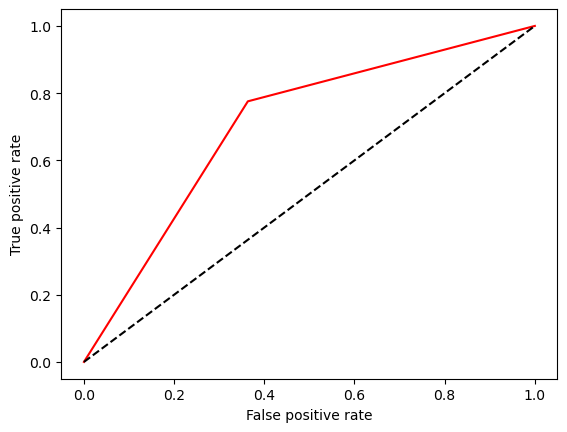

In [53]:
import matplotlib.pyplot as plt
plt.plot(fpr,tpr,color='red',label='logit model(area=0.2f)'%auc)
plt.plot([0,1],[0,1],'k--')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')